# R ML Crash Course_Part 5: Model Tune, Search & Ensemble

## Full Day Workshop for user learn Data Science with R
### 2018  Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


# Compare Models
- In this section we will look at 8 dierent techniques for comparing the estimated accuracy of
the constructed models.

In [6]:
# load packages
library(mlbench)
library(caret)
# load the dataset
data(PimaIndiansDiabetes)


In [5]:
head(dd)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
6,148,72,35,0,33.6,0.627,50,pos
1,85,66,29,0,26.6,0.351,31,neg
8,183,64,0,0,23.3,0.672,32,pos
1,89,66,23,94,28.1,0.167,21,neg
0,137,40,35,168,43.1,2.288,33,pos
5,116,74,0,0,25.6,0.201,30,neg


In [7]:
# prepare training scheme
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
# CART
set.seed(7)
fit.cart <- train(diabetes~., data=PimaIndiansDiabetes, method="rpart",
trControl=trainControl)
# LDA
set.seed(7)
fit.lda <- train(diabetes~., data=PimaIndiansDiabetes, method="lda", trControl=trainControl)
# SVM
set.seed(7)
fit.svm <- train(diabetes~., data=PimaIndiansDiabetes, method="svmRadial",
trControl=trainControl)
# KNN
set.seed(7)
fit.knn <- train(diabetes~., data=PimaIndiansDiabetes, method="knn", trControl=trainControl)
# Random Forest
set.seed(7)
fit.rf <- train(diabetes~., data=PimaIndiansDiabetes, method="rf", trControl=trainControl)
# collect resamples
results <- resamples(list(CART=fit.cart, LDA=fit.lda, SVM=fit.svm, KNN=fit.knn, RF=fit.rf))

Loading required package: rpart
Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:SparkR’:

    select

Loading required package: kernlab

Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha

The following object is masked from ‘package:SparkR’:

    size

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



## Table Summary
- The Table Summary is the easiest comparison that you can do. Simply call the summary()
function and pass it the resamples result. 
- It will create a table with one algorithm for each row
and evaluation metrics for each column.

In [8]:
# summarize differences between models
summary(results)


Call:
summary.resamples(object = results)

Models: CART, LDA, SVM, KNN, RF 
Number of resamples: 30 

Accuracy 
       Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
CART 0.6234  0.7115 0.7403 0.7382  0.7760 0.8442    0
LDA  0.6711  0.7532 0.7662 0.7759  0.8052 0.8701    0
SVM  0.6711  0.7403 0.7582 0.7651  0.7890 0.8961    0
KNN  0.6184  0.6984 0.7321 0.7299  0.7532 0.8182    0
RF   0.6842  0.7297 0.7582 0.7625  0.7922 0.8571    0

Kappa 
       Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
CART 0.1585  0.3296 0.3765 0.3934  0.4685 0.6393    0
LDA  0.2484  0.4196 0.4516 0.4801  0.5512 0.7048    0
SVM  0.2187  0.3889 0.4167 0.4520  0.5003 0.7638    0
KNN  0.1113  0.3228 0.3867 0.3819  0.4382 0.5867    0
RF   0.2853  0.3860 0.4553 0.4613  0.5169 0.6781    0


## Box and Whisker Plots
Box and Whisker Plots are a useful way to look at the spread of the estimated accuracies for
different methods and how they relate.

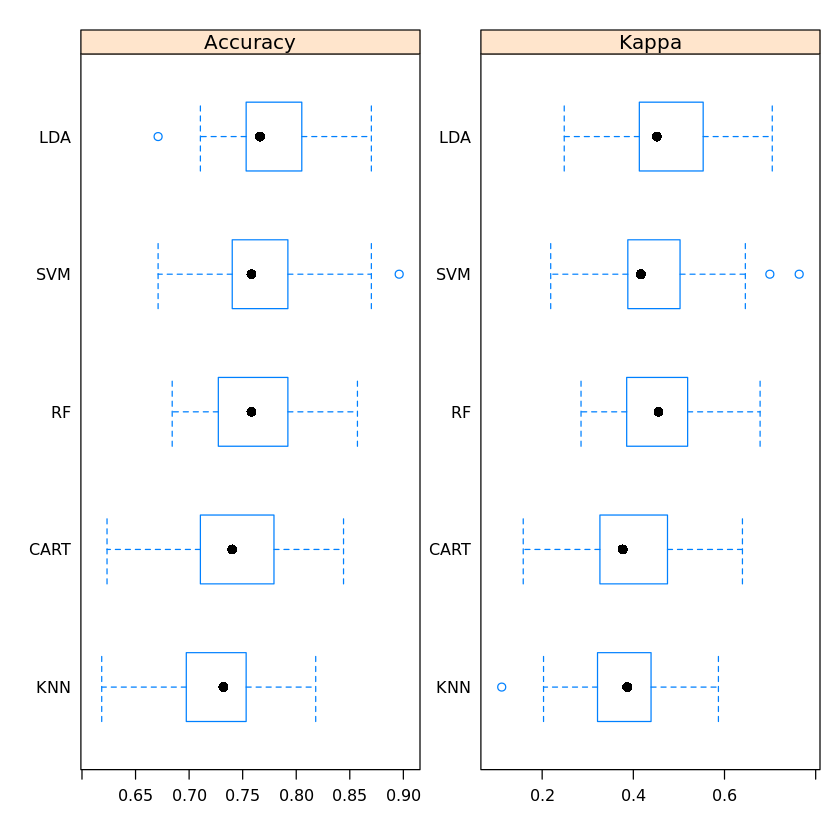

In [9]:
# box and whisker plots to compare models
scales <- list(x=list(relation="free"), y=list(relation="free"))
bwplot(results, scales=scales)

## Density Plots
- You can show the distribution of model accuracy as density plots. 
- This is a useful way to
evaluate the overlap in the estimated behavior of algorithms. 

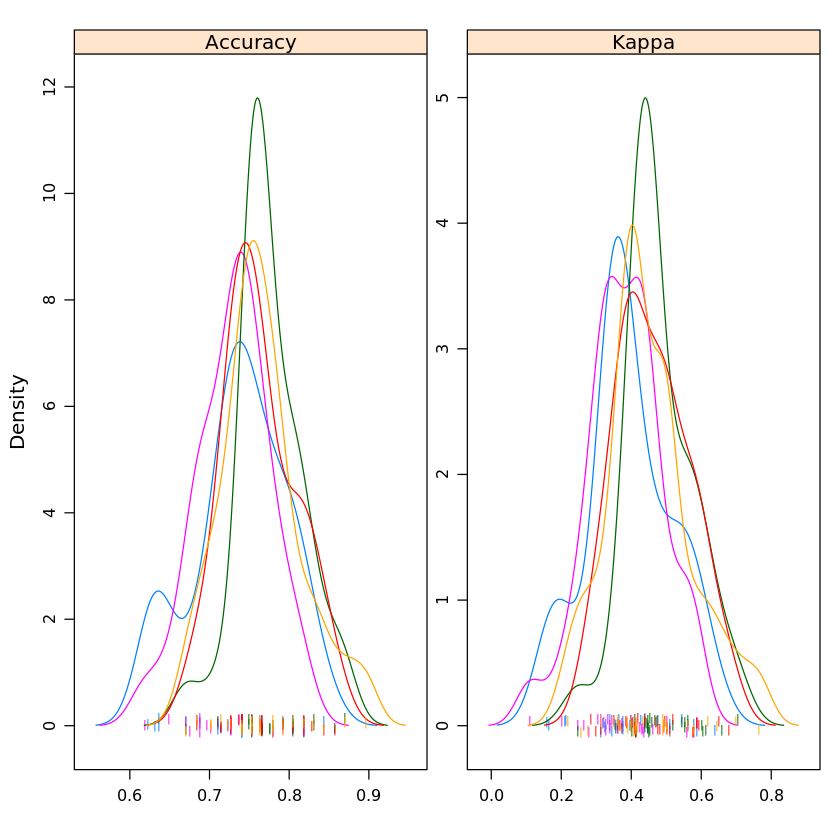

In [10]:
# density plots of accuracy
scales <- list(x=list(relation="free"), y=list(relation="free"))
densityplot(results, scales=scales, pch = "|")

## Dot Plots
- These are useful plots as they show both the mean estimated accuracy as well as the 95%
confidence interval 
- e.g. the range in which 95% of observed scores fell).

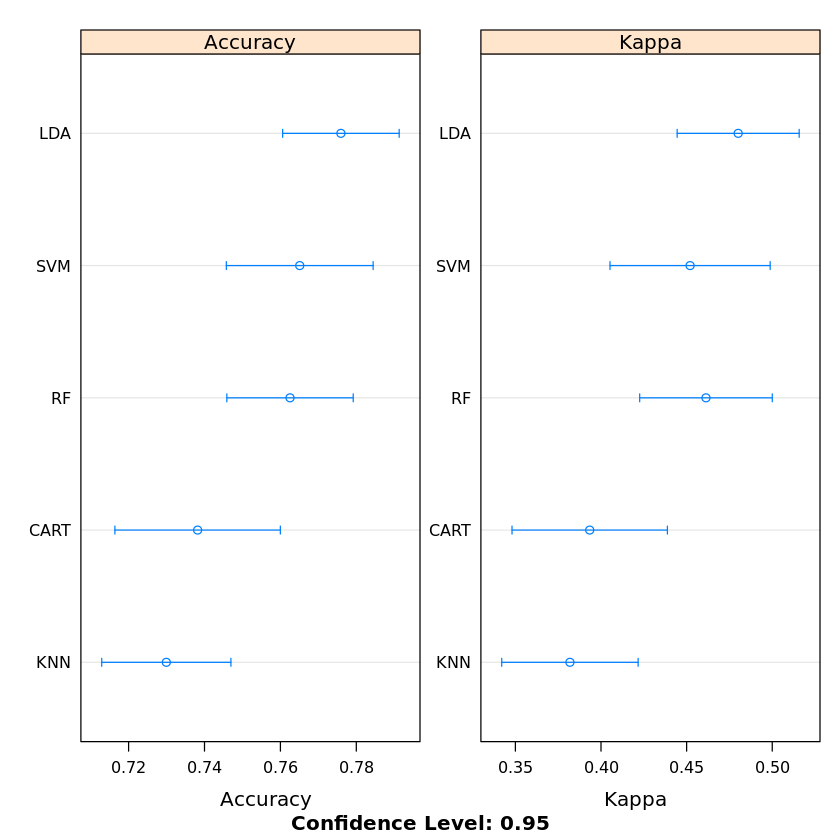

In [11]:
# dot plots of accuracy
scales <- list(x=list(relation="free"), y=list(relation="free"))
dotplot(results, scales=scales)

## Parallel Plots
- Parallel Plots are another way to look at the data. It shows how each trial of each cross-validation
fold behaved for each of the algorithms tested. 
- It can help you see how those hold-out subsets
that were difficult for one algorithm aected other algorithms.
- thinking about how different methods could be combined in an ensemble prediction (e.g. stacking) at a
later time, 
- especially if you see correlated movements in opposite directions.

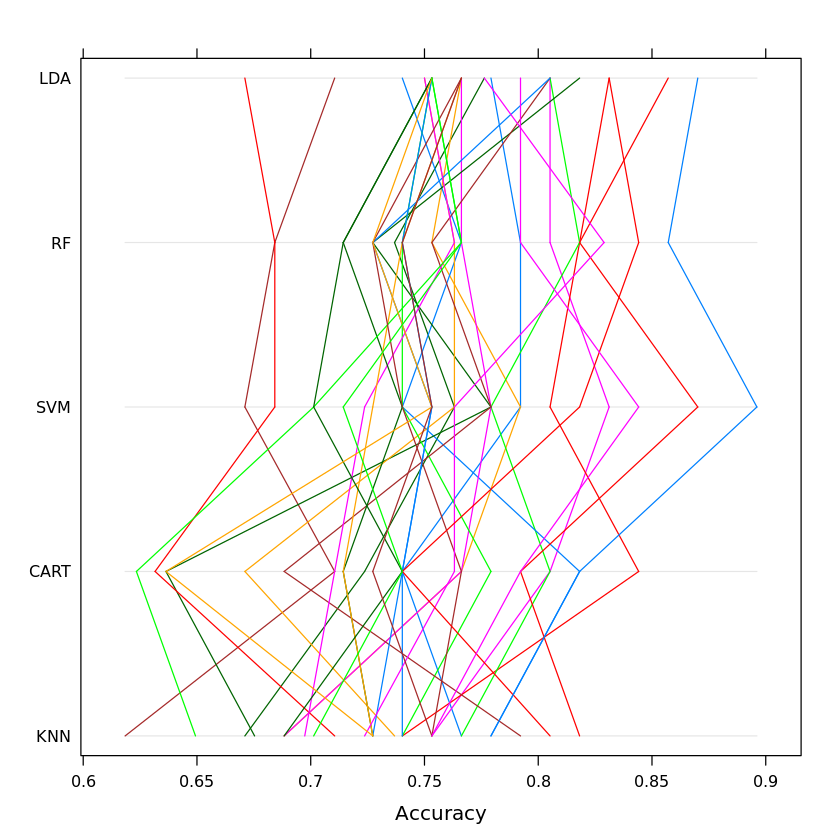

In [12]:
# parallel plots to compare models
parallelplot(results)

## Scatterplot Matrix
- This creates a scatter plot matrix of all fold-trial results for an algorithm compared to the same
fold-trial results for all other algorithms. 
- All pairs are plotted
- This is invaluable when considering whether the predictions from two dierent algorithms
are correlated. 
- If weakly correlated, they are good candidates for being combined in an ensemble
prediction. 
- For example, eye-balling the graphs it looks like LDA and SVM look strongly
correlated, 
- as does SVM and RF. SVM and CART look weakly correlated.

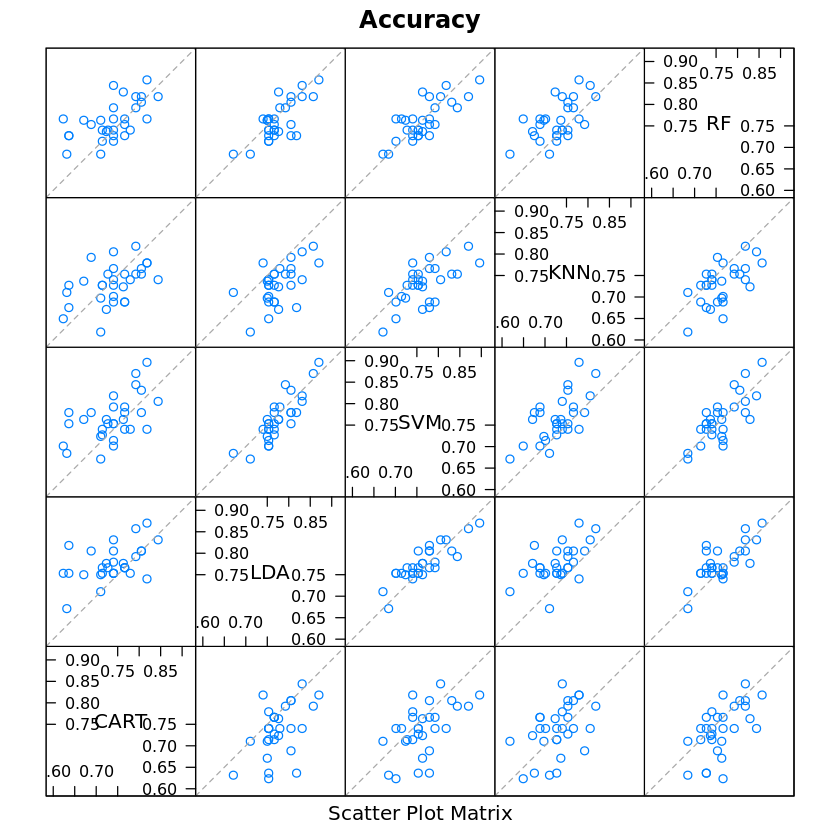

In [14]:
# pairwise scatter plots of predictions to compare models
splom(results)

## Pairwise xyPlots
- You can zoom in on one pairwise comparison of the accuracy of trial-folds for two machine
learning algorithms with an xyplot.

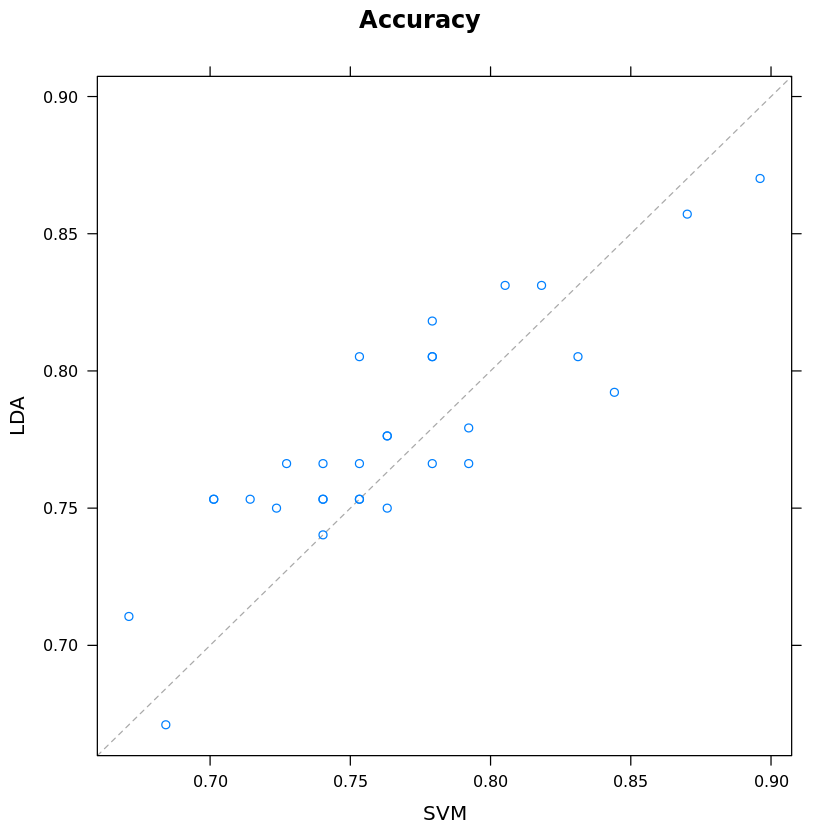

In [15]:
# xyplot plots to compare models
xyplot(results, models=c("LDA", "SVM"))

## Statistical Signicance Tests
- You can calculate the significance of the differences between the metric distributions of different
machine learning algorithms. 
- We can summarize the results directly by calling the summary()
function.

- The lower diagonal of the
table shows p-values for the null hypothesis (distributions are the same), smaller is better. We
can see no dierence between CART and KNN, 
- we can also see little dierence between the
distributions for LDA and SVM.
- The upper diagonal of the table shows the estimated dierence between the distributions. 
- If
we think that LDA is the most accurate model from looking at the previous graphs, 
- we can get
an estimate of how much better than specific other models in terms of absolute accuracy.
- These
scores can help with any accuracy claims you might want to make between specic algorithms.

In [16]:
# difference in model predictions
diffs <- diff(results)
# summarize p-values for pairwise comparisons
summary(diffs)


Call:
summary.diff.resamples(object = diffs)

p-value adjustment: bonferroni 
Upper diagonal: estimates of the difference
Lower diagonal: p-value for H0: difference = 0

Accuracy 
     CART      LDA       SVM       KNN       RF       
CART           -0.037759 -0.026908  0.008248 -0.024351
LDA  0.0050068            0.010851  0.046007  0.013409
SVM  0.0919580 0.3390336            0.035156  0.002558
KNN  1.0000000 1.218e-05 0.0007092           -0.032599
RF   0.0974572 0.2416366 1.0000000 0.0016066          

Kappa 
     CART      LDA       SVM       KNN       RF       
CART           -0.086692 -0.058612  0.011552 -0.067895
LDA  0.0015478            0.028079  0.098243  0.018796
SVM  0.0839950 0.2217402            0.070164 -0.009283
KNN  1.0000000 4.122e-05 0.0054686           -0.079447
RF   0.0129477 1.0000000 1.0000000 0.0006918          


# Algorithm Tuning To Search For Algorithm Parameters
- What parameters to tune?
- What search method to use to locate good algorithm parameters?
- What test options to use to limit overtting the training data?

## Sample Data: Radars Return
- It is a binary classication problem with 60 numerical input features that
describe the properties of the radar return.

In [17]:
# Load packages
library(randomForest)
library(mlbench)
library(caret)
# Load Dataset
data(Sonar)
dataset <- Sonar
x <- dataset[,1:60]
y <- dataset[,61]

In [18]:
head(Sonar)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,⋯,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,⋯,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,⋯,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,⋯,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,⋯,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,⋯,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


- Direct from the help page for the randomForest() function in R:
- mtry: Number of variables randomly sampled as candidates at each split.
- ntree: Number of trees to grow.
- Let's create a baseline for comparison by using the recommended defaults for each parameter
and mtry=floor(sqrt(ncol(x))) or mtry=7 and ntree=500.

In [20]:
# Create model with default paramters
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
seed <- 7
metric <- "Accuracy"
set.seed(seed)
mtry <- sqrt(ncol(x))
tunegrid <- expand.grid(.mtry=mtry)
rfDefault <- train(Class~., data=dataset, method="rf", metric=metric, tuneGrid=tunegrid,
trControl=trainControl)
print(rfDefault)

Random Forest 

208 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 187, 188, 188, 187, 187, 187, ... 
Resampling results:

  Accuracy   Kappa    
  0.8186869  0.6306185

Tuning parameter 'mtry' was held constant at a value of 7.745967
 


- The caret package provides an excellent facility to tune machine learning algorithm parameters.
- As such, only the mtry parameter is available for tuning in caret. 
- The reason is its eect
on the final accuracy and that it must be found empirically for a dataset. 
- The ntree parameter
is different in that it can be as large as you like, and continues to increase the accuracy up to
some point. 
- 
It is less difficult or critical to tune and could be limited by compute time available
more than anything.

## Random Search
- One search strategy that we can use is to try random values within a range. 
- This can be good
if we are unsure of what the value might be and we want to overcome any biases we may have
for setting the parameter

In [28]:
# Random Search
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3, search="random")
set.seed(seed)
mtry <- sqrt(ncol(x))
tunegrid <- expand.grid(.mtry=mtry)
rfRandom <- train(Class~., data=dataset, method="rf", metric=metric, tuneLength=15, tuneGrid=tunegrid,  trControl=trainControl)
print(rfRandom)
plot(rfRandom)

Random Forest 

208 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 187, 188, 188, 187, 187, 187, ... 
Resampling results:

  Accuracy   Kappa    
  0.8186869  0.6306185

Tuning parameter 'mtry' was held constant at a value of 7.745967
 


ERROR: Error in plot.train(rfRandom): There are no tuning parameters with more than 1 value.


- Note, that we are using a test harness similar to that which we would use to spot-check
algorithms. 
- Both 10-fold cross-validation and 3 repeats slows down the search process, 
- but is
intended to limit and reduce overfftting on the training dataset. 
- It won't remove overtting
entirely. 
- Holding back a validation set for nal checking is a great idea if you can spare the data.

## Grid Search
- Another search you can use is to dene a grid of algorithm parameters to try. Each axis of the
grid is an algorithm parameter, and points in the grid are specifuc combinations of parameters.
- Because we are only tuning one parameter, the grid search is a linear search through a vector of
candidate values.

Random Forest 

208 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 187, 188, 188, 187, 187, 187, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.8409091  0.6755998
   2    0.8236797  0.6408263
   3    0.8267677  0.6467102
   4    0.8332756  0.6600034
   5    0.8316811  0.6572757
   6    0.8205772  0.6354603
   7    0.8267749  0.6474675
   8    0.8186003  0.6308045
   9    0.8202670  0.6332465
  10    0.8202670  0.6336947
  11    0.8125541  0.6181094
  12    0.8218470  0.6368002
  13    0.8139899  0.6211052
  14    0.8158081  0.6244040
  15    0.8186724  0.6304945

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 1. 


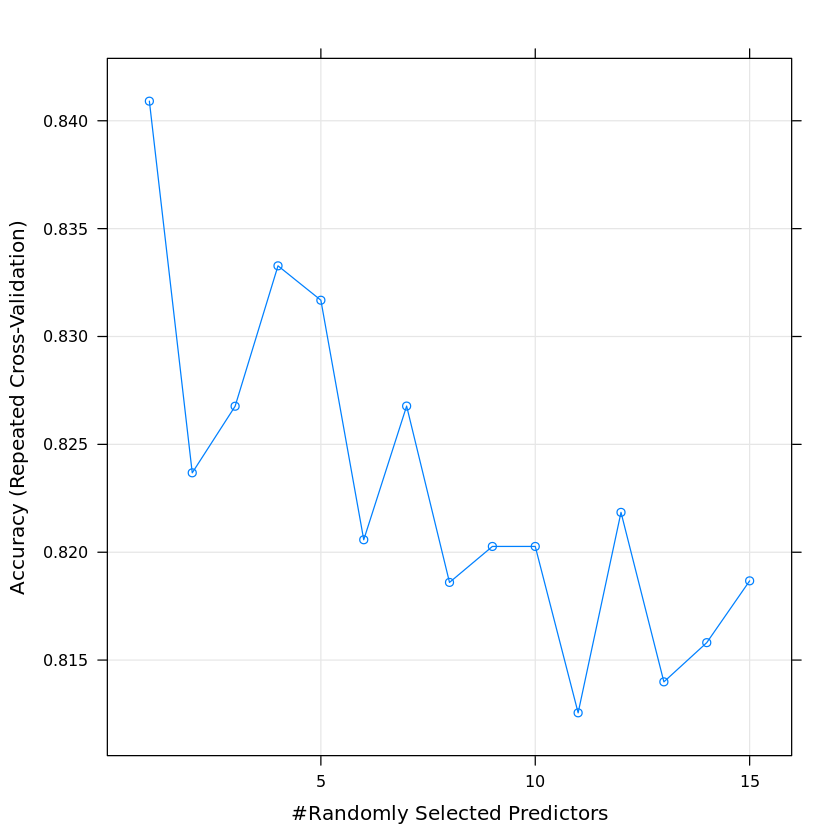

In [23]:
# Grid Search
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3, search="grid")
set.seed(seed)
tunegrid <- expand.grid(.mtry=c(1:15))
rfGrid <- train(Class~., data=dataset, method="rf", metric=metric, tuneGrid=tunegrid, trControl=trainControl)
print(rfGrid)
plot(rfGrid)

## Tune Using Algorithm Tools
- Some algorithm implementations provide tools for tuning the parameters of the algorithm. For
example, the Random Forest algorithm implementation in the randomForest package provides
the tuneRF() function that searches for optimal mtry values given your data.

mtry = 7  OOB error = 15.38% 
Searching left ...
mtry = 5 	OOB error = 15.38% 
0 1e-05 
Searching right ...
mtry = 10 	OOB error = 14.42% 
0.0625 1e-05 
mtry = 15 	OOB error = 16.83% 
-0.1666667 1e-05 
       mtry  OOBError
5.OOB     5 0.1538462
7.OOB     7 0.1538462
10.OOB   10 0.1442308
15.OOB   15 0.1682692


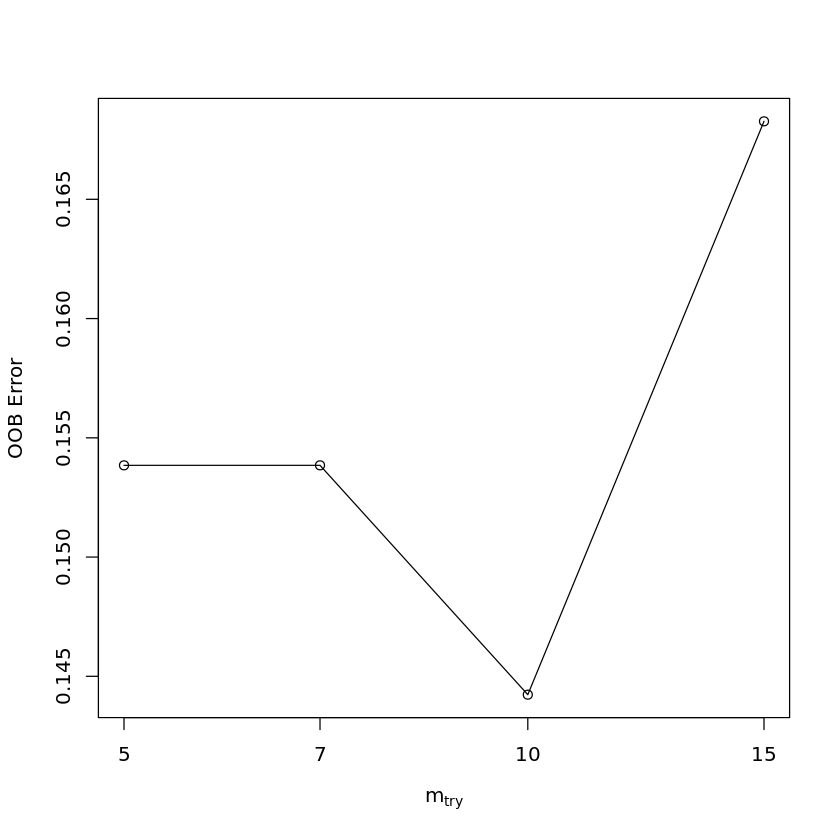

In [29]:
# Algorithm Tune (tuneRF)
set.seed(seed)
bestmtry <- tuneRF(x, y, stepFactor=1.5, improve=1e-5, ntree=500)
print(bestmtry)

- You can see that the most accurate value for mtry was 10 with an OOBError of 0.1442308.
- This does not really match up with what we saw in the caret repeated cross-validation
experiment above, where mtry=10 gave an accuracy of 82.04%. 
- Nevertheless, it is an alternate
way to tune the algorithm.

# Tune Manually

- One approach is to create
many caret models for our algorithm and pass in a different set of parameters directly to the
algorithm manually. 
- Let's look at an example doing this to evaluate dierent values for ntree
while holding mtry constant


Call:
summary.resamples(object = results)

Models: 1000, 1500, 2000, 2500 
Number of resamples: 30 

Accuracy 
      Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
1000 0.619  0.8095 0.8341 0.8268  0.8893 0.9091    0
1500 0.600  0.8000 0.8095 0.8203  0.8893 0.9091    0
2000 0.600  0.8000 0.8095 0.8234  0.9000 0.9091    0
2500 0.600  0.8000 0.8095 0.8186  0.8571 0.9091    0

Kappa 
       Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
1000 0.2222  0.6111 0.6573 0.6476  0.7741 0.8167    0
1500 0.1398  0.5876 0.6164 0.6335  0.7741 0.8167    0
2000 0.1398  0.5811 0.6164 0.6403  0.7980 0.8167    0
2500 0.1398  0.5811 0.6164 0.6304  0.7149 0.8167    0


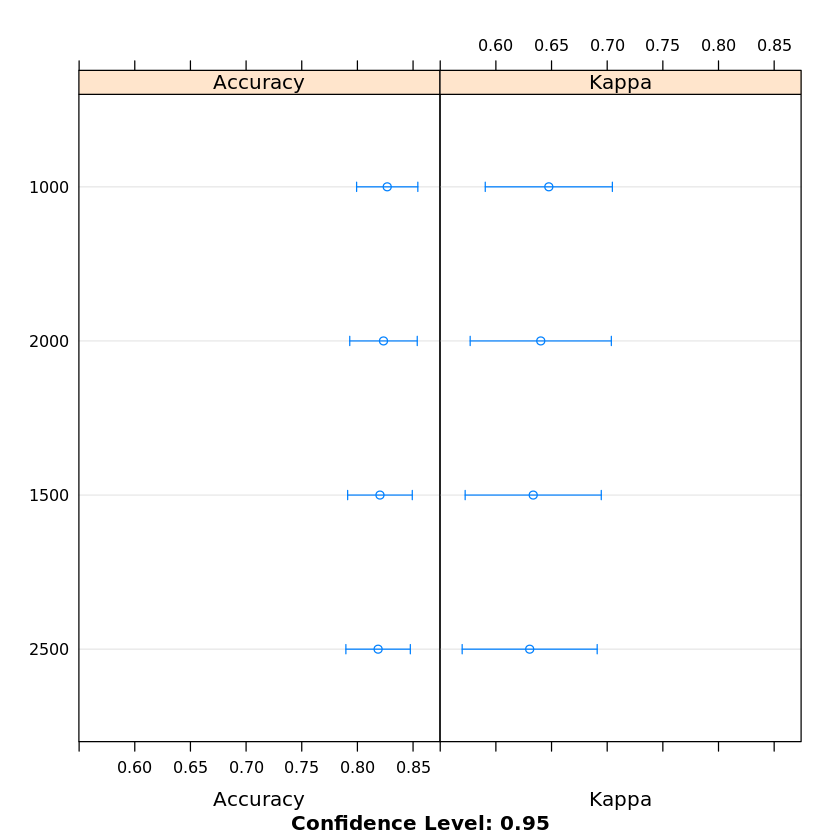

In [30]:
# Manual Search
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3, search="grid")
tunegrid <- expand.grid(.mtry=c(sqrt(ncol(x))))
modellist <- list()
for (ntree in c(1000, 1500, 2000, 2500)) {
set.seed(seed)
fit <- train(Class~., data=dataset, method="rf", metric=metric, tuneGrid=tunegrid,
trControl=trainControl, ntree=ntree)
key <- toString(ntree)
modellist[[key]] <- fit
}
# compare results
results <- resamples(modellist)
summary(results)
dotplot(results)

- You can see that the most accurate value for ntree was perhaps 2,000 with a mean accuracy
of 82.02% (a lift over our very rst experiment using the default mtry value). 
- The results
perhaps suggest an optimal value for ntree between 2,000 and 2,500. 
- Also note, we held mtry
constant at the default value. We could repeat the experiment with a possible better mtry=2
from the experiment above, 
- or try combinations of ntree and mtry in case their effects on the
algorithm and the result interact with each other.

## Extend Caret
- Another approach is to create a new algorithm for caret to support. 
- This is the same Random
Forest algorithm you have been using, 
- only modified so that it supports the tuning of multiple
parameters. 
- A risk with this approach is that the caret native support for the algorithm has
additional or fancy code wrapping it that subtly but importantly changes its behavior. 
- You
may need to repeat prior experiments with your custom algorithm support.

In [31]:
customRF <- list(type="Classification", library="randomForest", loop=NULL)
customRF$parameters <- data.frame(parameter=c("mtry", "ntree"), class=rep("numeric", 2),
label=c("mtry", "ntree"))
customRF$grid <- function(x, y, len=NULL, search="grid") {}
customRF$fit <- function(x, y, wts, param, lev, last, weights, classProbs, ...) {
randomForest(x, y, mtry=param$mtry, ntree=param$ntree, ...)
}
customRF$predict <- function(modelFit, newdata, preProc=NULL, submodels=NULL)
predict(modelFit, newdata)
customRF$prob <- function(modelFit, newdata, preProc=NULL, submodels=NULL)
predict(modelFit, newdata, type = "prob")
customRF$sort <- function(x) x[order(x[,1]),]
customRF$levels <- function(x) x$classes

- We can define our own algorithm to use in caret by defining a list that contains a number
of custom named elements that the caret package looks for, 
- such as how to fit and how to
predict. 
- See below for a definition of a custom random forest algorithm for use with caret that
takes both an mtry and ntree parameters.

In [ ]:
# train model
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
tunegrid <- expand.grid(.mtry=c(1:15), .ntree=c(1000, 1500, 2000, 2500))
set.seed(seed)
custom <- train(Class~., data=dataset, method=customRF, metric=metric, tuneGrid=tunegrid,
trControl=trainControl)
print(custom)
plot(custom)

- This may take a minute or two to run. You can see that the most accurate values for ntree
and mtry were 2,000 and 2 with an accuracy of 84.43%. 
- We do perhaps see some interaction
effects between the number of trees and the value of ntree. 
- Nevertheless, if we had chosen
the best value for mtry found using grid search of 2 (above) and the best value of ntree found
using grid search of 2,000 (above), 
- in this case we would have achieved the same level of tuning
found in this combined search. This is a nice confirmation.

# Combine Model Predictions Into Ensemble Predictions
The three most popular methods for combining the predictions from dierent models are:

- **Bagging**

Building multiple models (typically models of the same type) from dierent
subsamples of the training dataset.

- **Boosting** 

Building multiple models (typically models of the same type) each of which
learns to fix the prediction errors of a prior model in the chain.

- **Stacking**

Building multiple models (typically models of differing types) and a supervised
model that learns how to best combine the predictions of the primary models.

### Example Dataset: Ionosphere 
Describes high-frequency antenna returns from high energy particles in the atmosphere
and whether the return shows structure or not

In [34]:
install.packages('caretEnsemble')

Installing package into ‘/user-home/_global_/R’
(as ‘lib’ is unspecified)
also installing the dependency ‘pbapply’

Warning message in install.packages("caretEnsemble"):
“installation of package ‘caretEnsemble’ had non-zero exit status”

In [35]:
# Load packages
library(mlbench)
library(caret)
library(caretEnsemble)
# Load the dataset
data(Ionosphere)
dataset <- Ionosphere
dataset <- dataset[,-2]
dataset$V1 <- as.numeric(as.character(dataset$V1))

ERROR: Error in library(caretEnsemble): there is no package called ‘caretEnsemble’


In [ ]:
head(dataset, n=5)

## Boosting Algos
We can look at two of the most popular boosting machine learning algorithms:

- C5.0
- Stochastic Gradient Boosting.

In [ ]:
install.packages('gbm')

In [ ]:
# Example of Boosting Algorithms
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
seed <- 7
metric <- "Accuracy"
# C5.0
set.seed(seed)
fit.c50 <- train(Class~., data=dataset, method="C5.0", metric=metric,
trControl=trainControl)
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(Class~., data=dataset, method="gbm", metric=metric,
trControl=trainControl, verbose=FALSE)
# summarize results
boostingResults <- resamples(list(c5.0=fit.c50, gbm=fit.gbm))
summary(boostingResults)
dotplot(boostingResults)

#### We can see that the C5.0 algorithm produced a more accurate model with an accuracy of 94.58%.

## Bagging Algorithms
Let's look at two of the most popular bagging machine learning algorithms:

- Bagged CART.
 
- Random Forest.

In [ ]:
install.packages('ipred')

Installing package into ‘/user-home/_global_/R’
(as ‘lib’ is unspecified)
also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’

Warning message in install.packages("ipred"):
“installation of package ‘numDeriv’ had non-zero exit status”

In [ ]:
# Example of Bagging algorithms
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
seed <- 7
metric <- "Accuracy"
# Bagged CART
set.seed(seed)
fit.treebag <- train(Class~., data=dataset, method="treebag", metric=metric,
trControl=trainControl)
# Random Forest
set.seed(seed)
fit.rf <- train(Class~., data=dataset, method="rf", metric=metric, trControl=trainControl)
# summarize results
baggingResults <- resamples(list(treebag=fit.treebag, rf=fit.rf))
summary(baggingResults)
dotplot(baggingResults)

#### We can see that the Random Forest algorithm produced a more accurate model with an accuracy of 93.25%.

## Stacking Algorithms
- You can combine the predictions of multiple caret models using the caretEnsemble package.
- Given a list of caret models, the caretStack() function can be used to specify a higher-order
model to learn how to best combine together the predictions of sub-models.

In [ ]:
# Example of Stacking algorithms
# create submodels
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3,
savePredictions=TRUE, classProbs=TRUE)
algorithmList <- c('lda', 'rpart', 'glm', 'knn', 'svmRadial')
set.seed(seed)
models <- caretList(Class~., data=dataset, trControl=trainControl, methodList=algorithmList)
results <- resamples(models)
summary(results)
dotplot(results)

### Pick up Low-Correlated algorithms to Stack
- When we combine the predictions of dierent models using stacking, 
- it is desirable that the
predictions made by the sub-models have low correlation. 
- This would suggest that the models
are skillful but in different ways, 
- allowing a new classifier to figure out how to get the best from
each model for an improved score. 
- If the predictions for the sub-models were highly corrected
(> 0:75) 
- then they would be making the same or very similar predictions most of the time
reducing the benet of combining the predictions.

In [ ]:
# correlation between results
modelCor(results)
splom(results)

- We can see that all pairs of predictions have generally low correlation. The two methods
with the highest correlation between their predictions are Logistic Regression (GLM) and KNN
at 0.517 correlation 
- which is not considered high (> 0:75).

In [ ]:
# stack using glm
stackControl <- trainControl(method="repeatedcv", number=10, repeats=3,
savePredictions=TRUE, classProbs=TRUE)
set.seed(seed)
stack.glm <- caretStack(models, method="glm", metric="Accuracy", trControl=stackControl)
print(stack.glm)

- We can see that we have lifted the accuracy to 94.99%, which is a small improvement over
using SVM alone. 
- This is also an improvement over using random forest alone on the dataset,
as observed above.

### More Sophsiticated Stacking: RF Stack

In [ ]:
# stack using random forest
set.seed(seed)
stack.rf <- caretStack(models, method="rf", metric="Accuracy", trControl=stackControl)
print(stack.rf)

#### We can see that this has lifted the accuracy to 96.26% an impressive improvement over SVM alone.

# Summary
## Tips For Evaluating Algorithms

- Using a data split into a training and test set is a good idea when you have a lot of data
and you are condent that your training sample is representative of the larger dataset.
- Using a data split is very ecient and is often used to get a quick estimate of model
accuracy.
- Cross-validation is a gold standard for evaluating model accuracy, often with k-folds set
to 5 or 10 to balance overtting the training data with a fair accuracy estimate.
- Repeated k-fold cross-validation is preferred when you can aord the computational
expense and require a less biased estimate.